In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils

In [2]:
#1.DataLoader
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()

In [3]:
print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#2. 
L,W,H = X_train.shape

X_train = X_train.reshape(-1,W*H) #1차원으로 펼침
X_test = X_test.reshape(-1,W*H)

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
#입력데이터 전처리
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
#3. Y  입력 데이터 전처리
'''
output에서는 총 10개의 카테고리가 있다.
각각의 노드에서 이미지에 해당하는 예측 값을 
0~1사이의 확률 분포로 만들 필요가 있음
One Hot Encoding방식으로 변환해줌
np_uTILS.TO_CATEGORICAL()()함수를 사용한다
'''

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [9]:
print(Y_train)
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
#4. Setting Hyper_parameters
input_size = 28*28
hidden_size = 100
num_classes = 10
epochs = 10
batch_size = 100

In [11]:
#5. Model Generator
model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu' ,input_shape=(input_size,)))
model.add(layers.Dense(num_classes,activation='softmax'))

In [12]:
#6. Compile
model.compile('sgd','categorical_crossentropy',metrics=['accuracy']) #metrics는 평가지표

In [13]:
#7.Learning
model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2) #validation:Training = 2:8

Epoch 1/10
480/480 [==============================] - 1s 3ms/step - loss: 1.1617 - accuracy: 0.7130 - val_loss: 0.6392 - val_accuracy: 0.8495
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.5626 - accuracy: 0.8583 - val_loss: 0.4515 - val_accuracy: 0.8857
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8814 - val_loss: 0.3859 - val_accuracy: 0.8977
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8914 - val_loss: 0.3514 - val_accuracy: 0.9061
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8981 - val_loss: 0.3284 - val_accuracy: 0.9107
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.9036 - val_loss: 0.3121 - val_accuracy: 0.9138
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3255 - accuracy: 0.9081 - val_loss: 0.2980 - val_accuracy: 0.9193
Epoch 

In [14]:
#8.Test
model_performance = model.evaluate(X_test,Y_test,batch_size=batch_size)
print('Loss: {}, Accuracy: {}'.format(*model_performance))

100/100 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.9258
Loss: 0.2706126868724823, Accuracy: 0.9258000254631042


In [27]:
# 9 .시각화
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training,Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training,Validation'])

In [21]:
history = model.fit(X_train,Y_train,epochs=50,batch_size=batch_size,validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1171 - accuracy: 0.9678 - val_loss: 0.1339 - val_accuracy: 0.9613
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9682 - val_loss: 0.1333 - val_accuracy: 0.9617
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9685 - val_loss: 0.1319 - val_accuracy: 0.9623
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9686 - val_loss: 0.1311 - val_accuracy: 0.9622
Epoch 5/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9697 - val_loss: 0.1301 - val_accuracy: 0.9630
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1110 - accuracy: 0.9696 - val_loss: 0.1294 - val_accuracy: 0.9635
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9699 - val_loss: 0.1291 - val_accuracy: 0.9636
Epoch 

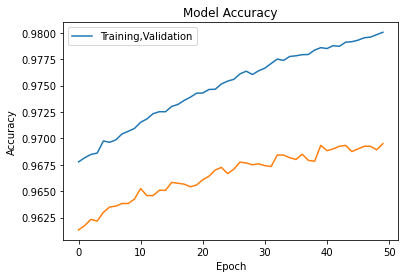

In [30]:
plot_acc(history)